
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:30%;"
/>
</center>

 **Universidad Nacional de Córdoba**
---

## Practico - **Introduccion al Aprendizaje Automatico**


El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos 
en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, 
así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

Para este practico se usara el dataset obtenido en el practico anterior
> Dataset Original: [here](https://drive.google.com/file/d/1wCNrWQbUd_bh1mdjZ-dg3g9y0r02JyQN/view?usp=sharing)

Recuerden que la ciencia de datos es un proceso circular, continuo y no lineal. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

## Librerías

In [1]:
import pyarrow
import fastparquet
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

Para cargar el dataset

In [2]:
df = pd.read_parquet("myfile.parquet")

In [3]:
df.columns

Index(['dni', 'mes', 'antig', 'producto_naranja_movimiento=AV',
       'producto_naranja_movimiento=AX', 'producto_naranja_movimiento=EX',
       'producto_naranja_movimiento=MC', 'producto_naranja_movimiento=PC',
       'producto_naranja_movimiento=PL', 'producto_naranja_movimiento=PN',
       'producto_naranja_movimiento=PP', 'producto_naranja_movimiento=SM',
       'producto_naranja_movimiento=TA', 'producto_naranja_movimiento=VI',
       'producto_naranja_movimiento=ZE', 'tipo_producto_tarjeta_movimiento=0',
       'tipo_producto_tarjeta_movimiento=3',
       'tipo_producto_tarjeta_movimiento=99', 'marca_debito_automatico=0',
       'marca_debito_automatico=1', 'cat_comercio=0', 'cat_comercio=1',
       'cat_comercio=2', 'cat_comercio=3', 'cat_comercio=4', 'cat_comercio=5',
       'cat_comercio=6', 'cat_comercio=7', 'cat_comercio=8', 'cat_comercio=9',
       'plan_movimiento=1', 'plan_movimiento=10', 'plan_movimiento=11',
       'plan_movimiento=12', 'plan_movimiento=2', 'plan_movi

In [4]:
df.shape

(7474, 42)

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

,antig,producto_naranja_movimiento=AV,producto_naranja_movimiento=AX,producto_naranja_movimiento=EX,producto_naranja_movimiento=MC,producto_naranja_movimiento=PC,producto_naranja_movimiento=PL,producto_naranja_movimiento=PN,producto_naranja_movimiento=PP,producto_naranja_movimiento=SM,producto_naranja_movimiento=TA,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=99,marca_debito_automatico=0,marca_debito_automatico=1,cat_comercio=0,cat_comercio=1,cat_comercio=2,cat_comercio=3,cat_comercio=4,cat_comercio=5,cat_comercio=6,cat_comercio=7,cat_comercio=8,cat_comercio=9,plan_movimiento=1,plan_movimiento=10,plan_movimiento=11,plan_movimiento=12,plan_movimiento=2,plan_movimiento=3,plan_movimiento=4,plan_movimiento=5,plan_movimiento=6,plan_movimiento=8,plan_movimiento=9,monto_normalizado
count,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.00000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7474.000000,7.474000e+03
mean,108.387744,8.364196,0.009232,0.553920,1.430961,6.130185,391.605967,0.563152,0.209928,32.071983,0.018464,71.160289,16.349880,216.411159,224.626438,87.430559,430.469360,97.998796,255.581215,103.78258,18.166711,10.420524,0.733075,51.189189,7.283115,1.467889,3.135135,76.708724,492.675140,0.379583,0.120016,1.638614,3.348006,18.336232,1.077469,0.964009,7.643431,0.110784,2.174873,8.080331e+05
std,78.419155,22.662933,0.798128,14.707309,18.715363,25.527850,309.648925,7.072002,4.548733,40.802962,1.128648,188.932543,30.007301,152.676889,274.390908,213.387237,366.387424,140.535017,165.356091,187.82455,62.950553,62.944668,11.267703,113.524826,48.553644,20.186534,29.842007,200.529199,398.885017,5.726821,3.288797,11.827165,18.867891,46.763739,14.541377,8.657336,27.691507,2.984466,14.051579,1.050111e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.604432e+05
25%,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138.000000,51.500000,0.000000,207.000000,0.000000,138.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.246294e+04
50%,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,138.000000,0.000000,345.000000,69.000000,207.000000,69.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,414.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.431228e+05
75%,157.000000,0.000000,0.000000,0.000000,0.000000,0.000000,552.000000,0.000000,0.000000,69.000000,0.000000,69.000000,0.000000,276.000000,345.000000,69.000000,552.000000,138.000000,345.000000,138.00000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,69.000000,689.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.154492e+06
max,390.000000,138.000000,69.000000,621.000000,621.000000,414.000000,4209.000000,276.000000,138.000000,207.000000,69.000000,3312.000000,138.000000,2139.000000,4071.000000,3618.000000,4860.000000,1173.000000,1449.000000,2402.00000,1242.000000,1173.000000,483.000000,3864.000000,1932.000

## 1. Preparación

* Usar la columna monto movimiento como target para modelos de regresión.
* Con el objetivo de preparar los datos para los modelos de clasificacion.
  Crear una columna que indique si un cliente ha aumentado el monto de movimiento 
  mesual, comparando con el mes anterior. En donde 
  - 1 si el monto ha aumentado respecto del mes anterior (con un incremento mayor o igual al 10%)
  - 0 si no fue asi.
  > consideraciones: el primer mes del dataset, el valor es 0
  
* Las variables explicativas (variables X's) no deben estar muy correlacionadas entre ellas, 
  ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. 
  Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros 
  cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada. En el caso de encontrar multicolinealidad, 
  - Cómo se puede solucionar? Qué decisión tomarían al respecto?
  
* Es posible que sea necesario normalizar las features de nuestro dataset. En qué casos tendrá que implementarse normalización?


#### A) Agregamos columna aumento o disminución monto.

In [6]:
df_copia=df

In [7]:
df=df.sort_values(['dni','mes'])
df.head(10)

,dni,mes,antig,producto_naranja_movimiento=AV,producto_naranja_movimiento=AX,producto_naranja_movimiento=EX,producto_naranja_movimiento=MC,producto_naranja_movimiento=PC,producto_naranja_movimiento=PL,producto_naranja_movimiento=PN,producto_naranja_movimiento=PP,producto_naranja_movimiento=SM,producto_naranja_movimiento=TA,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=99,marca_debito_automatico=0,marca_debito_automatico=1,cat_comercio=0,cat_comercio=1,cat_comercio=2,cat_comercio=3,cat_comercio=4,cat_comercio=5,cat_comercio=6,cat_comercio=7,cat_comercio=8,cat_comercio=9,plan_movimiento=1,plan_movimiento=10,plan_movimiento=11,plan_movimiento=12,plan_movimiento=2,plan_movimiento=3,plan_movimiento=4,plan_movimiento=5,plan_movimiento=6,plan_movimiento=8,plan_movimiento=9,monto_normalizado
0,000000b5aea2c9ea7cc155f6ebcef97f826,2020-08,225.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-512.67
1,000000b5aea2c9ea7cc155f6ebcef97f826,2020-09,226.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-498.18
2,000000b5aea2c9ea7cc155f6ebcef97f826,2020-10,227.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-480.24
3,000000b5aea2c9ea7cc155f6ebcef97f826,2020-11,228.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-465.06
4,000000b5aea2c9ea7cc155f6ebcef97f826,2020-12,229.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-447.81
5,000000b5aea2c9ea7cc155f6ebcef97f826,2021-01,230.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-429.87
6,000000b5aea2c9ea7cc155f6ebcef97f826,2021-02,231.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-415.38
7,000000b5aea2c9ea7cc155f6ebcef97f826,2021-03,232.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-396.06
8,000000b5aea2c9ea7cc155f6ebcef97f826,2021-04,233.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-380.88
9,000000b5aea2c9ea7cc155f6ebcef97f826,2021-05,234.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,69.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-368.46


In [8]:
df.loc[0,'incremento_monto'] = 0
for i in range(1, len(df)):
  dni_anterior = df.loc[i-1, 'dni']
  monto_mes_anterior = df.loc[i-1, 'monto_normalizado']
  dni_actual = df.loc[i, 'dni']
  monto_mes_actual = df.loc[i, 'monto_normalizado']
  if dni_anterior != dni_actual:
      df.loc[i,'incremento_monto'] = 0
  else:
      df.loc[i,'incremento_monto'] = 1 if monto_mes_actual >= (monto_mes_anterior * 1.1)  else 0

In [9]:
#Chequeo con exito
df[df['dni']=='000f0b73ebfa002a79a0642b82e87919904'][['dni', 'mes', 'monto_normalizado', 'incremento_monto']]

,dni,mes,monto_normalizado,incremento_monto
7464,000f0b73ebfa002a79a0642b82e87919904,2020-08,438038.91,0.0
7465,000f0b73ebfa002a79a0642b82e87919904,2020-09,80238.72,0.0
7466,000f0b73ebfa002a79a0642b82e87919904,2020-10,76553.43,0.0
7467,000f0b73ebfa002a79a0642b82e87919904,2020-11,31763.46,0.0
7468,000f0b73ebfa002a79a0642b82e87919904,2020-12,997331.52,1.0
7469,000f0b73ebfa002a79a0642b82e87919904,2021-01,1231405.74,1.0
7470,000f0b73ebfa002a79a0642b82e87919904,2021-02,71606.13,0.0
7471,000f0b73ebfa002a79a0642b82e87919904,2021-03,280926.60,1.0
7472,000f0b73ebfa002a79a0642b82e87919904,2021-04,484608.39,1.0
7473,000f0b73ebfa002a79a0642b82e87919904,2021-05,209047.92,0.0


#### B) Separamos Target.

In [10]:
X, Y  = df.drop('monto_normalizado', axis=1), df[['monto_normalizado', 'mes']]# se deja mes para luego hacer la division, y se quita.
YC= df[['incremento_monto', 'mes']]
X.shape , Y.shape, YC.shape

((7474, 42), (7474, 2), (7474, 2))

#### C) Correlación de variables.

In [11]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [12]:
corr = df.corr()
corr=corr[['monto_normalizado']]
corr.loc[:,'abs_corr']=np.abs(corr['monto_normalizado'])
corr.sort_values(by='abs_corr',ascending = False).style.background_gradient()

,monto_normalizado,abs_corr
monto_normalizado,1.000000,1.000000
tipo_producto_tarjeta_movimiento=3,0.651951,0.651951
marca_debito_automatico=0,0.593502,0.593502
producto_naranja_movimiento=PL,0.584232,0.584232
plan_movimiento=1,0.582157,0.582157
cat_comercio=1,0.447241,0.447241
producto_naranja_movimiento=ZE,0.371158,0.371158
marca_debito_automatico=1,0.345227,0.345227
plan_movimiento=3,0.337848,0.337848
cat_comercio=9,0.332230,0.332230


In [13]:
#TODO: Falta conclusion (por el momento no se van a quitar variables - alternativa a malos resultados quitar 
#variables con cvorr mayor a 0.9 que no sean productos o cat_comercio)
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
var_corr= tidy_corr_matrix(corr_matrix).sort_values(by='abs_r',ascending=False)
var_corr.head(20)

,variable_1,variable_2,r,abs_r
1118,cat_comercio=9,producto_naranja_movimiento=VI,0.979627,0.979627
478,producto_naranja_movimiento=VI,cat_comercio=9,0.979627,0.979627
626,tipo_producto_tarjeta_movimiento=99,producto_naranja_movimiento=VI,0.971334,0.971334
466,producto_naranja_movimiento=VI,tipo_producto_tarjeta_movimiento=99,0.971334,0.971334
642,tipo_producto_tarjeta_movimiento=99,cat_comercio=9,0.962219,0.962219
1122,cat_comercio=9,tipo_producto_tarjeta_movimiento=99,0.962219,0.962219
684,marca_debito_automatico=0,plan_movimiento=1,0.928112,0.928112
1164,plan_movimiento=1,marca_debito_automatico=0,0.928112,0.928112
274,producto_naranja_movimiento=PL,plan_movimiento=1,0.897216,0.897216
1154,plan_movimiento=1,producto_naranja_movimiento=PL,0.897216,0.897216


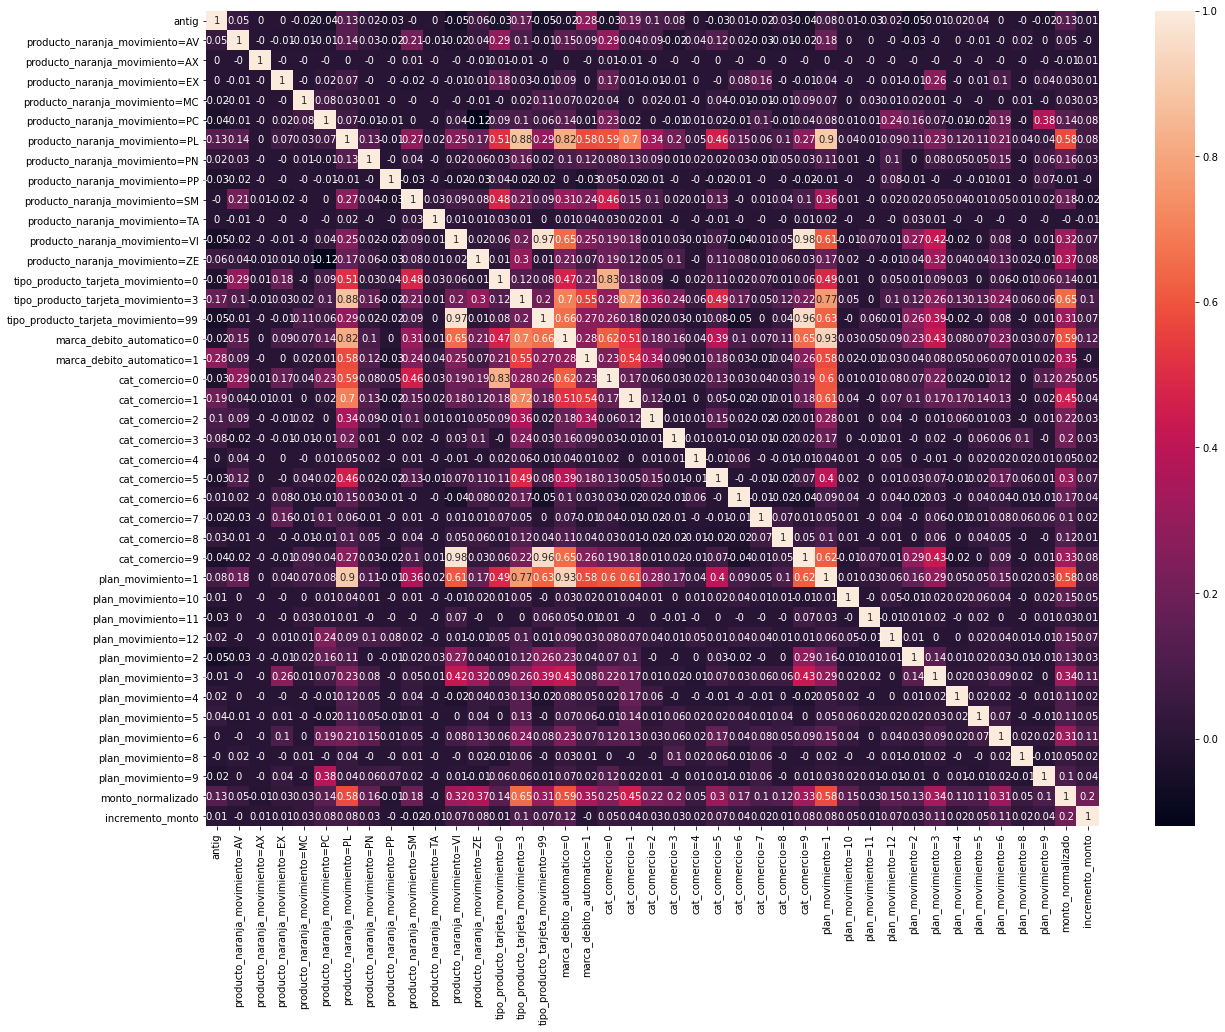

In [14]:
plt.figure(figsize=(20,15))
corr = df.corr().round(2)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True)
plt.show()

#### D) Normalización

El modelo polinomial prefiere que los datos estén escalados. 

Analizando las maneras de escalar (sobre todo MinMax y StandardScaler) vemos que corremos el riesgo de determinar un máximo que luego pueda ser superado, no cumpliendo con su mision de dejar los datos entre el 0 y 1. Por el otro lado, StandardScaler aplicar una media y desviación propias de cada variable, por lo que podría generar diferencias entre valores similares (por ejemplo el valor 0 en dos variables luego del escalado podrían quedar con valores diferentes).

Se determinará la forma de escalar analizando cada Modelo, con sus características y variables.

## 2. División

La primer tarea consiste en dividir el conjunto de datos, en conjuntos de entrenamiento (training), validación (validation).
evaluación (testing) 

<img 
     src="https://i.stack.imgur.com/pXAfX.png" 
     alt="Drawing" 
     style="width:40%;"
/>

* Para el conjunto de evaluacion tomar el ultimo mes del dataset.
* Para entrenamiento y validación utilizar aproximadamente 70-80% de los datos para entrenamiento y 30-20% para validación.
* Es conveniente mezclar los datos aleatoriamente a la hora de realizar la división de los datos? 
 > `shuffle=True`?
* Pensar si hacer de esta forma la división puede afectar la distribución espacial y temporal de los datos. Cuáles pueden ser las consecuencias?

### División de los datos.

In [15]:
#separamos targuet para clasificación
YC= df[['incremento_monto', 'mes']]

In [16]:
X_test= X[(X['mes']=='2021-05') | (X['mes']=='2021-04')]
Y_test= Y[(Y['mes']=='2021-05') | (Y['mes']=='2021-04')]         #target regresión
YC_test=YC[(YC['mes']=='2021-05') | (YC['mes']=='2021-04')]  #target clasificación

X_train_total=X[(X['mes']<'2021-04')]
Y_train_total=Y[(Y['mes']<'2021-04')]     #target regresión
YC_train_total=YC[(YC['mes']<'2021-04')]  #target clasificación

#division en validación regresión
X_train, X_validation, Y_train, Y_validation, = train_test_split(X_train_total, Y_train_total, test_size=0.2, random_state=0, shuffle=False)

#division en validación clasificación
X_train_clas, X_validation_clas, YC_train, YC_validation=train_test_split(X_train_total, YC_train_total, test_size=0.2, random_state=0, shuffle=False)

print('Test',X_test.shape,Y_test.shape, YC_test.shape)
print('Train Total',X_train_total.shape,Y_train_total.shape, YC_train_total.shape)
print('Train Regresion',X_train.shape,Y_train.shape,'Validation', X_validation.shape, Y_validation.shape)
print('Train Clasificación',X_train_clas.shape,YC_train.shape,'Validation', X_validation_clas.shape, YC_validation.shape)

Test (1089, 42) (1089, 2) (1089, 2)
Train Total (6385, 42) (6385, 2) (6385, 2)
Train Regresion (5108, 42) (5108, 2) Validation (1277, 42) (1277, 2)
Train Clasificación (5108, 42) (5108, 2) Validation (1277, 42) (1277, 2)


**A tener en cuenta :**
Debido a que eligiendo solo un mes nos dejaba muy pocos datos para la evaluación (aprox 5% del total), decidimos dejar para la evaluación los ultimos 2 meses con 1089 movimientos (aprox 15% del total).

No nos parece conveniente **mezclar los datos** (shuffle=True) a la hora de separarlos ya que para nuestro problema a resolver es conveniente mantener una cierta estructura de los datos con respecto a los clientes.

Ademas no respetar el **espacio temporal** podria llevar a conclusiones erroneas (no es lo mismo medir la evolución para un lado del tiempo o para el otro o sin un sentido, por ejemplo si a lo largo del tiempo un cliente consume cada vez mas, no manteniendo el orden cronológico el modelo puede interpretar, entrenando con los datos al revés que el cliente consume cada vez menos).

### Analisis de proporción en la división.

In [17]:
cols = ['producto_naranja_movimiento=AV',
       'producto_naranja_movimiento=AX', 'producto_naranja_movimiento=EX',
       'producto_naranja_movimiento=MC', 'producto_naranja_movimiento=PC',
       'producto_naranja_movimiento=PL', 'producto_naranja_movimiento=PN',
       'producto_naranja_movimiento=PP', 'producto_naranja_movimiento=SM',
       'producto_naranja_movimiento=TA', 'producto_naranja_movimiento=VI',
       'producto_naranja_movimiento=ZE', 
       'tipo_producto_tarjeta_movimiento=0',
       'tipo_producto_tarjeta_movimiento=3',
       'tipo_producto_tarjeta_movimiento=99', 
       'marca_debito_automatico=0',
       'marca_debito_automatico=1', 
       'cat_comercio=0', 'cat_comercio=1',
       'cat_comercio=2', 'cat_comercio=3', 'cat_comercio=4', 'cat_comercio=5',
       'cat_comercio=6', 'cat_comercio=7', 'cat_comercio=8', 'cat_comercio=9',
       'plan_movimiento=1', 'plan_movimiento=10', 'plan_movimiento=11',
       'plan_movimiento=12', 'plan_movimiento=2', 'plan_movimiento=3',
       'plan_movimiento=4', 'plan_movimiento=5', 'plan_movimiento=6',
       'plan_movimiento=8', 'plan_movimiento=9']


In [18]:
X_test_2= X[(X['mes']=='2021-05') | (X['mes']=='2021-04')]
X_train_total_2=X[(X['mes']<'2021-04')]

Q_total_DF= len(X)
Q_total_test=len(X_test)
Q_total_train= len(X_train_total)

print('Total DF',Q_total_DF)
print('Test',Q_total_test)
print('Train Total',Q_total_train)
print("")
print(f'Proporcion Test sobre Total: {round(Q_total_test/Q_total_DF,2)}')
print("")
for col in cols:
  total_por_prod= X[X[col] != 0][[col]].count()[0]
  total_por_prod_train= X_train_total_2[X_train_total_2[col] != 0][[col]].count()[0]
  total_por_prod_test= X_test_2[X_test_2[col] != 0][[col]].count()[0]
  total_ideal_test= total_por_prod * 0.15

    
  print(col)
  print(f'Total: {total_por_prod}')
  print(f'Train: {round( total_por_prod_train / total_por_prod, 2)}')
  print(f'Test : {round(total_por_prod_test / total_por_prod ,2)}')
  print(f'Ideal Test : {round(total_ideal_test ,2)}, Hay: {total_por_prod_test}')  
  


Total DF 7474
Test 1089
Train Total 6385

Proporcion Test sobre Total: 0.15

producto_naranja_movimiento=AV
Total: 901
Train: 0.9
Test : 0.1
Ideal Test : 135.15, Hay: 90
producto_naranja_movimiento=AX
Total: 1
Train: 1.0
Test : 0.0
Ideal Test : 0.15, Hay: 0
producto_naranja_movimiento=EX
Total: 15
Train: 0.87
Test : 0.13
Ideal Test : 2.25, Hay: 2
producto_naranja_movimiento=MC
Total: 84
Train: 0.88
Test : 0.12
Ideal Test : 12.6, Hay: 10
producto_naranja_movimiento=PC
Total: 486
Train: 0.81
Test : 0.19
Ideal Test : 72.9, Hay: 93
producto_naranja_movimiento=PL
Total: 7158
Train: 0.88
Test : 0.12
Ideal Test : 1073.7, Hay: 879
producto_naranja_movimiento=PN
Total: 55
Train: 0.91
Test : 0.09
Ideal Test : 8.25, Hay: 5
producto_naranja_movimiento=PP
Total: 18
Train: 0.83
Test : 0.17
Ideal Test : 2.7, Hay: 3
producto_naranja_movimiento=SM
Total: 3099
Train: 0.89
Test : 0.11
Ideal Test : 464.85, Hay: 350
producto_naranja_movimiento=TA
Total: 2
Train: 1.0
Test : 0.0
Ideal Test : 0.3, Hay: 0
prod

TODO:
Sacar columnas:
- producto_naranja_movimiento=AX (1 solo movimiento)
- producto_naranja_movimiento=TA (2 movimientos)

Traspasar algunos datos=
- cat_comercio=4 (0.05% datos en test)
- plan_movimiento=10 (0.08% datos en test)
- plan_movimiento=11 (0.08% datos en test)
- plan_movimiento=8  ( 0% datos en test)

## 3. Regresión

* Se puede explicar el monto de los movimientos en base a la antiguedad del cliente?
  - Usar un modelo polinomial.
  - Cuál será la función de costo utilizada?
  - Grafique las curvas de error en términos del grado del polinomio. 
  - Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.

* Regresión con más de una variable
  - Explicar, Por qué se eligieron dichas variables?
  - Grafique las curvas de error en términos del grado del polinomio. 
  - Se obtuvieron mejores resultados? Por qué?
* Evaluar el modelo
  - Una vez elegido el mejor modelo. validar con el cojunto evaluación
  
 
> Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

### Unica Variable

#### A) Modelo Polinomial - Antiguedad Cliente - Sin BIAS

##### Preparación Matrices - Selecciono Variables

In [19]:
X_train_Antig = (X_train.loc[:, 'antig'].values.reshape(-1,1))
X_valid_Antig = (X_validation.loc[:, 'antig'].values.reshape(-1,1))

Y_train=Y_train.monto_normalizado
Y_validation= Y_validation.monto_normalizado

X_train_Antig.shape, X_valid_Antig.shape

((5108, 1), (1277, 1))

##### Escalado

In [20]:
#min_max_scaler = MinMaxScaler()
#X_train_Antig= min_max_scaler.fit_transform(X_train_Antig)
#X_valid_Antig=min_max_scaler.fit_transform(X_valid_Antig)

#standard_scaler = StandardScaler()
#X_train_Antig= standard_scaler.fit_transform(X_train_Antig)
#X_valid_Antig=standard_scaler.fit_transform(X_valid_Antig)


Se hizo la prueba de escalar los datos de la variable antiguedad de las dos maneras (Standard y MinMax) llegando a la coclusion que se obtienen mejores resultados sin escalar.

Si bien con MinMax se encontró un error de validación mas pequeño que sin escalar, pero decidimos dejar sin escalado ya que el modelo pareciera ser mas siemple (Modelo elegido: Grado 2 , mientras que Escalado con MinMax tenía grado 118).

##### Entrenamiento, Predicción y Evalucación

In [21]:
train_errors = []
valid_errors = []
degrees = range(1,20)
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree, include_bias=False) #quitamos bias
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_Antig, Y_train)
    
    # predict:
    Y_train_pred = model.predict(X_train_Antig)
    Y_valid_pred = model.predict(X_valid_Antig)
    
    # evaluate:
    train_error = mean_squared_error(Y_train, Y_train_pred)
    valid_error = mean_squared_error(Y_validation, Y_valid_pred)
    
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    
    print(f'Grado {degree}: Train error {train_error.round(3)},Valid error {valid_error.round(3)}')                   


    

Grado 1: Train error 1271056217788.836,Valid error 1458977831031.486
Grado 2: Train error 1193733737645.162,Valid error 1445615327874.809
Grado 3: Train error 1184500089585.776,Valid error 1396367504781.944
Grado 4: Train error 1156923791196.955,Valid error 1405761406007.497
Grado 5: Train error 1149813576132.948,Valid error 1395389635198.971
Grado 6: Train error 1135653358627.677,Valid error 1590053692628.215
Grado 7: Train error 1182505477169.559,Valid error 1904853571388.108
Grado 8: Train error 1235239607354.458,Valid error 2107824854720.517
Grado 9: Train error 1283114714924.695,Valid error 1928140602954.192
Grado 10: Train error 1374356058745.525,Valid error 5395190503755.934
Grado 11: Train error 1413248422199.161,Valid error 11462180410544.418
Grado 12: Train error 1451393499340.576,Valid error 25173045956255.742
Grado 13: Train error 1490445735632.82,Valid error 51990407670160.21
Grado 14: Train error 1531472177381.402,Valid error 90833108511109.5
Grado 15: Train error 1571815

In [22]:
print(f'Valid Error Minimo: {min(valid_errors)}, Grado: {valid_errors.index(min(valid_errors))+1}')


Valid Error Minimo: 1395389635198.9712, Grado: 5


##### Grafico Errores

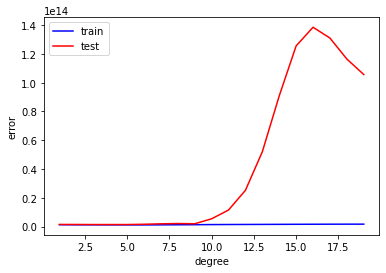

In [23]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, valid_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

##### Grafico Modelo

In [24]:
x_start = min(np.min(X_train_Antig), np.min(X_valid_Antig))
x_end = max(np.max(X_train_Antig), np.max(X_valid_Antig))
x = np.linspace(x_start, x_end, 200).reshape(-1)
x.shape

(200,)

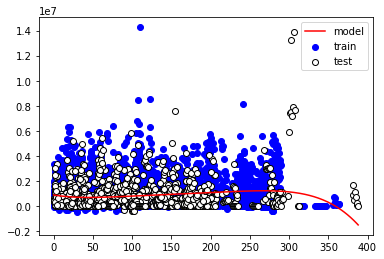

Train error: 1149813576132.948242
Validation error: 1395389635198.971191


In [25]:
degree = 5
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_Antig, Y_train);

plt.scatter(X_train_Antig, Y_train, color="blue", label="train")
plt.scatter(X_valid_Antig, Y_validation, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

print(f'Train error: {train_errors[degree-1]:f}')
print(f'Validation error: {valid_errors[degree-1]:f}')

#### B) Modelo Polinomial - Antiguedad Cliente - Con BIAS

##### Preparación Matrices - Selecciono Variables

In [26]:
X_train_Antig = (X_train.loc[:, 'antig'].values.reshape(-1,1))
X_valid_Antig = (X_validation.loc[:, 'antig'].values.reshape(-1,1))

X_train_Antig.shape, X_valid_Antig.shape

((5108, 1), (1277, 1))

##### Escalado

In [27]:
standard_scaler = StandardScaler()
X_train_Antig= standard_scaler.fit_transform(X_train_Antig)
X_valid_Antig=standard_scaler.fit_transform(X_valid_Antig)

#min_max_scaler = MinMaxScaler()
#X_train_Antig= min_max_scaler.fit_transform(X_train_Antig)
#X_valid_Antig=min_max_scaler.fit_transform(X_valid_Antig)

Podemos ver que cuando incluimos el BIAS y escalando los datos con StandardScaler se obtiene una leve mejora del resultado, manteniendo el mismo grado de complejidad.

##### Entrenamiento, Predicción y Evalucación

In [28]:
train_errors = []
valid_errors = []
degrees = range(1,15)
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_Antig, Y_train)
    
    # predict:
    Y_train_pred = model.predict(X_train_Antig)
    Y_valid_pred = model.predict(X_valid_Antig)
    
    # evaluate:
    train_error = mean_squared_error(Y_train, Y_train_pred)
    valid_error = mean_squared_error(Y_validation, Y_valid_pred)
    
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    
    print(f'Grado {degree}: Train error {train_error.round(3)},Valid error {valid_error.round(3)}')                   


    

Grado 1: Train error 1121221563804.888,Valid error 1329766957341.092
Grado 2: Train error 1121190032439.825,Valid error 1328336802269.801
Grado 3: Train error 1112834507553.213,Valid error 1368938645200.788
Grado 4: Train error 1112658101104.379,Valid error 1373993607838.949
Grado 5: Train error 1111785443528.714,Valid error 1395407970881.663
Grado 6: Train error 1110535238192.995,Valid error 1557650844331.664
Grado 7: Train error 1110175187840.353,Valid error 1394327894555.458
Grado 8: Train error 1109371480478.436,Valid error 1476281342363.89
Grado 9: Train error 1099891050082.331,Valid error 17144346399015.111
Grado 10: Train error 1099818101326.266,Valid error 23187788449464.613
Grado 11: Train error 1098325958725.378,Valid error 2345280138164.526
Grado 12: Train error 1095560263490.362,Valid error 216890021077802.6
Grado 13: Train error 1094815050023.455,Valid error 752668774106737.2
Grado 14: Train error 1094488696241.405,Valid error 183924913015623.4


In [29]:
print(f'Valid Error Minimo: {min(valid_errors)}, Grado: {valid_errors.index(min(valid_errors))+1}')

Valid Error Minimo: 1328336802269.801, Grado: 2


##### Grafico Errores

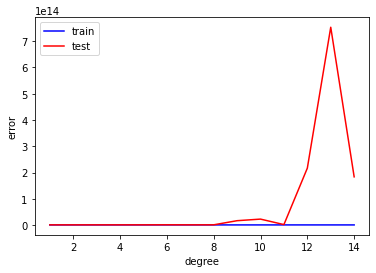

In [30]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, valid_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

##### Grafico Modelo

In [31]:
x_start = min(np.min(X_train_Antig), np.min(X_valid_Antig))
x_end = max(np.max(X_train_Antig), np.max(X_valid_Antig))
x = np.linspace(x_start, x_end, 200).reshape(-1)
x.shape

(200,)

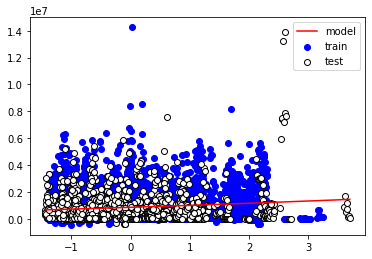

Train error: 1112834507553.212646
Validation error: 1368938645200.787842


In [32]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_Antig, Y_train);

plt.scatter(X_train_Antig, Y_train, color="blue", label="train")
plt.scatter(X_valid_Antig, Y_validation, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

print(f'Train error: {train_errors[degree]:f}')
print(f'Validation error: {valid_errors[degree]:f}')

Como conclusion podemos decir que la variable antiguedad por si sola no explica los movimientos. Esto se sostiene en el gran valor de los Errores tanto en train como en validación.

Lafunción de costo utilizada es el error cuadratico.

Con la salvedad de que los modelos no son buenos, el mejor de ellos es:

- Modelo Polinomial Grado 2 - Con Bias - Normalizado.


### Varias Variables

El criterio de seleccion de variables fue la correlación con el monto (obtubimos las variables de mayor correlación), ademas de tener en cuenta las correlaciones entre las variables (se quitaron aquellas variables correlacionadas entre sí en mas de 0.9 salvo para los casos de productos y comercios que no se quitaron). Quedandonos con 11 variables.

##### Preparación Matrices - Selecciono Variables

In [33]:
cols= ['antig',
       'producto_naranja_movimiento=PL',
       'producto_naranja_movimiento=ZE',
       'producto_naranja_movimiento=VI',
       'tipo_producto_tarjeta_movimiento=3',
       'plan_movimiento=1',
       'plan_movimiento=3', 
       'plan_movimiento=6',
       'cat_comercio=1', 
       'cat_comercio=5',
       'cat_comercio=9'
      ]
X_train_all = X_train[cols].values
X_valid_all = X_validation[cols].values

X_train_all.shape, X_valid_all.shape

((5108, 11), (1277, 11))

##### Escalado

In [34]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_all= scaler.fit_transform(X_train_all)
X_valid_all= scaler.fit_transform(X_valid_all)


##### Entrenamiento, Predicción y Evalucación

In [35]:
train_errors = []
valid_errors = []
degrees = range(1,5)
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_all, Y_train)
    
    # predict:
    Y_train_pred = model.predict(X_train_all)
    Y_valid_pred = model.predict(X_valid_all)
    
    # evaluate:
    train_error = mean_squared_error(Y_train, Y_train_pred)
    valid_error = mean_squared_error(Y_validation, Y_valid_pred)
    
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    
    print(f'Grado {degree}: Train error {train_error.round(3)},Valid error {valid_error.round(3)}')                   


    

Grado 1: Train error 530815476757.454,Valid error 713665844947.462
Grado 2: Train error 463823008633.355,Valid error 720804022884.034
Grado 3: Train error 369678180967.414,Valid error 2374457382336.965
Grado 4: Train error 210960783207.758,Valid error 2368865303328706.0


In [36]:
print(f'Valid Error Minimo: {min(valid_errors)}, Grado: {valid_errors.index(min(valid_errors))+1}')

Valid Error Minimo: 713665844947.4617, Grado: 1


##### Grafico Errores

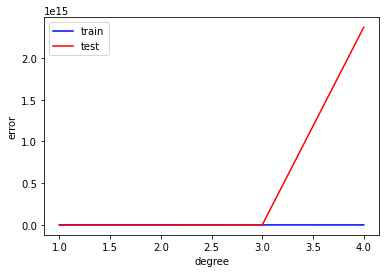

In [37]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, valid_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Luego de aplicar todos los modelos, observamos que el que nos dió mejores resultados es:

-Modelo Polinomial de Grado 1 - Normalizado - Varias Variables - Con BIAS.

### Evalucación del mejor Modelo

**Modelo Polinomial de Grado 1 - Normalizado - Varias Variables - Con BIAS.**

##### Preparación Matrices - Selecciono Variables

In [38]:
cols= ['antig',
       'producto_naranja_movimiento=PL',
       'producto_naranja_movimiento=ZE',
       'producto_naranja_movimiento=VI',
       'tipo_producto_tarjeta_movimiento=3',
       'plan_movimiento=1',
       'plan_movimiento=3', 
       'plan_movimiento=6',
       'cat_comercio=1', 
       'cat_comercio=5',
       'cat_comercio=9'
      ]
X_train_total = X_train_total[cols].values
X_test = X_test[cols].values


X_train_total.shape, X_test.shape

((6385, 11), (1089, 11))

In [39]:
#preparamos los targuet
Y_train_total= Y_train_total.monto_normalizado
Y_test= Y_test.monto_normalizado

##### Escalado

In [40]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_total_R= scaler.fit_transform(X_train_total)
X_test_R= scaler.fit_transform(X_test)


##### Entrenamiento, Predicción y Evalucación

In [41]:
train_errors = []
valid_errors = []

# train:
pf = PolynomialFeatures(1)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_total_R, Y_train_total)

# predict:
Y_train_pred = model.predict(X_train_total_R)
Y_valid_pred = model.predict(X_test_R)

# evaluate:
train_error = mean_squared_error(Y_train_total, Y_train_pred)
valid_error = mean_squared_error(Y_test, Y_valid_pred)

train_errors.append(train_error)
valid_errors.append(valid_error)

print(f'Grado {degree}: Train error {train_error.round(3)},Valid error {valid_error.round(3)}')

Grado 4: Train error 561956792966.608,Valid error 422653557891.396


**Validación:** podemos ver que los resultados de validación con el conjunto de evaluacion dieron aún mejores resultados que los obtenidos anteriormente.
Esto se puede deber al ingreso de nuevos datos a la hora de entrenar.

## 4. Clasificación
* El TARGET se encuentra desbalanceado?
* Entrenar modelos lineales y No lineales de clasificación para predecir la variable objetivo.
* Seleccionar distintos valores para los hiperparámetros de los modelos usando `GridSearchCV`.
* Evaluar el modelo con el cojunto evaluación usando.
   - Accuracy
   - Precision
   - Recall
   - F1
   - matriz de confusión
* Explicar el por qué de cada resultado.

### Balance Target

In [42]:
print(X_train_total.shape,
YC_train_total.shape,
X_test.shape,
YC_test.shape)
#X_train_clas.shape,
#YC_train.shape,
#X_validation_clas.shape,
#YC_validation.shape)

(6385, 11) (6385, 2) (1089, 11) (1089, 2)


In [43]:
#Sobre el Total
aumento_T=df[df['incremento_monto'] == 1].count()['incremento_monto']
no_aumento_T=df[df['incremento_monto'] == 0].count()['incremento_monto']

#Sobre Partición Train Total /Test:
aumento_TT=YC_train_total[YC_train_total['incremento_monto'] == 1].count()['incremento_monto']
no_aumento_TT=YC_train_total[YC_train_total['incremento_monto'] == 0].count()['incremento_monto']

#Sobre Particion Train/Validación
#aumento_TV=YC_validation[YC_validation['incremento_monto'] == 1].count()['incremento_monto']
#no_aumento_TV=YC_validation[YC_validation['incremento_monto'] == 0].count()['incremento_monto']

print('Aumentó' , aumento_T,'-', 'Porcentaje s/ Total:', round(aumento_T/(aumento_T+no_aumento_T),2))
print('No Aumentó',no_aumento_T,'-','Porcentaje s/ Total:', round(no_aumento_T/(aumento_T+no_aumento_T),2))
print("")
print('Aumentó' , aumento_TT,'-', 'Porcentaje s/ Total:', round(aumento_TT/(aumento_TT+no_aumento_TT),2))
print('No Aumentó',no_aumento_TT,'-','Porcentaje s/ Total:', round(no_aumento_TT/(aumento_TT+no_aumento_TT),2))
#print("")
#print('Aumentó' , aumento_TV,'-', 'Porcentaje s/ Total:', round(aumento_TV/(aumento_TV+no_aumento_TV),2))
#print('No Aumentó',no_aumento_TV,'-','Porcentaje s/ Total:', round(no_aumento_TV/(aumento_TV+no_aumento_TV),2))

Aumentó 3130 - Porcentaje s/ Total: 0.42
No Aumentó 4344 - Porcentaje s/ Total: 0.58

Aumentó 2717 - Porcentaje s/ Total: 0.43
No Aumentó 3668 - Porcentaje s/ Total: 0.57


Si bien se ve que la proporción en todos los targets no es exactamente el 50 y 50%, tampoco podemos decir que nos encontramos datos tan desbalanceados. 
En general la relación es 57/43%, lo que parece estar mas balanceado que desbalanceado. Además vemos que la relación para los subconjuntos se mantiene en cuanto al total.
A la hora de analizar las métricas, consideramos que la que nos puede dar una buena orientación es Accuracy, ya que como mencionamos antes, consideramos que el objetivo esta relativamente balanceado y ademas no ponderamos algun resultado por sobre el otro. Pero sin perder de vista el F1.

### Modelos

In [44]:
seed = 0

In [45]:
YC_train_total=YC_train_total.incremento_monto
YC_test=YC_test.incremento_monto

### Lineales

#### SGDClassifier

##### Escalado

In [46]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_total_C= scaler.fit_transform(X_train_total)
X_test_C= scaler.fit_transform(X_test)


##### Entrenamiento

In [47]:
param_grid = {
    'loss': ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l2','l1'],
    'eta0': [1e-3, 1e-4, 1e-5, 10],
    'learning_rate': ['optimal', 'constant', 'adaptive']
    #'max_iter': [1000, 2000, 5000]  
}

model = SGDClassifier(random_state=seed)
cv = GridSearchCV(model, param_grid, scoring=["recall", "accuracy", "precision", "f1"], cv=4, refit=False)
cv.fit(X_train_total_C, YC_train_total)

results = cv.cv_results_
params = results['params']

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Pr

##### Métricas y Matríz de Confusión.

In [48]:
results_df = pd.DataFrame(results)
results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_eta0', 'param_learning_rate', 'param_loss',
       'param_penalty', 'params', 'split0_test_recall', 'split1_test_recall',
       'split2_test_recall', 'split3_test_recall', 'mean_test_recall',
       'std_test_recall', 'rank_test_recall', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
       'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision', 'mean_test_precision',
       'std_test_precision', 'rank_test_precision', 'split0_test_f1',
       'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'mean_test_f1',
       'std_test_f1', 'rank_test_f1'],
      dtype='object')

In [49]:
relevant_metrics=["mean_test_recall", "std_test_recall",
           "mean_test_accuracy", "std_test_accuracy",
           "mean_test_precision", "std_test_precision", 'mean_test_f1',
           "rank_test_recall", 'rank_test_precision', 'rank_test_accuracy', 'rank_test_f1']
params= ["param_alpha", "param_loss", "param_penalty", 'param_eta0']

results_df= results_df[relevant_metrics + params]
results_df

,mean_test_recall,std_test_recall,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_f1,rank_test_recall,rank_test_precision,rank_test_accuracy,rank_test_f1,param_alpha,param_loss,param_penalty,param_eta0
0,0.517456,0.112314,0.530619,0.061805,0.471184,0.052129,0.479870,50,478,611,33,0.00001,hinge,l2,0.001
1,0.587939,0.303420,0.466855,0.073911,0.446256,0.085757,0.444568,13,542,713,110,0.00001,hinge,l1,0.001
2,0.371391,0.164034,0.512141,0.052464,0.431006,0.044288,0.375839,208,579,676,330,0.00001,log,l2,0.001
3,0.428508,0.151940,0.554263,0.049244,0.485862,0.055193,0.433364,138,443,520,145,0.00001,log,l1,0.001
4,0.483319,0.177830,0.494598,0.063617,0.427553,0.049726,0.435740,74,585,705,140,0.00001,modified_huber,l2,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.000000,0.000000,0.574471,0.000156,0.000000,0.000000,0.000000,647,647,425,647,1,modified_huber,l1,10
716,0.221199,0.022911,0.612217,0.009284,0.625153,0.027283,0.326280,574,53,9,533,1,squared_hinge,l2,10
717,0.000000,0.000000,0.574471,0.000156,0.000000,0.000000,0.000000,647,647,425,647,1,squared_hinge,l1,10
718,0.582602,0.122341,0.507288,0.059218,0.451554,0.039127,0.497562,20,536,685,9,1,perceptron,l2,10


In [50]:
highest_rank= 1
metric='rank_test_accuracy'
results_df[results_df[metric]== highest_rank]

,mean_test_recall,std_test_recall,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_f1,rank_test_recall,rank_test_precision,rank_test_accuracy,rank_test_f1,param_alpha,param_loss,param_penalty,param_eta0
624,0.221935,0.02229,0.612843,0.00993,0.627528,0.030884,0.32742,572,49,1,531,1,modified_huber,l2,0.001
626,0.221935,0.02229,0.612843,0.00993,0.627528,0.030884,0.32742,572,49,1,531,1,squared_hinge,l2,0.001


In [51]:
clf_best = SGDClassifier(random_state=seed, alpha=1, loss= "modified_huber", eta0= 0.001, penalty="l2")

clf_best.fit(X_train_total_C, YC_train_total)
y_pred_best = clf_best.predict(X_test_C)

In [52]:
print(classification_report(YC_test, y_pred_best))

              precision    recall  f1-score   support

         0.0       0.62      0.88      0.73       676
         1.0       0.39      0.13      0.19       413

    accuracy                           0.59      1089
   macro avg       0.50      0.50      0.46      1089
weighted avg       0.53      0.59      0.52      1089



In [53]:
tn, fp, fn, tp = confusion_matrix(YC_test, y_pred_best).ravel()
print ("Anterior modelo", (tn, fp, fn, tp))

Anterior modelo (592, 84, 360, 53)


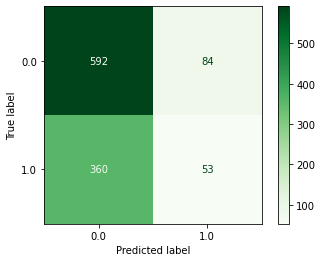

In [54]:
plot_confusion_matrix(clf_best, X_test_C, YC_test, cmap='Greens')

#### Regresión Logística

##### Escalado

In [55]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_total_C= scaler.fit_transform(X_train_total)
X_test_C= scaler.fit_transform(X_test)


##### Entrenamiento

In [56]:
model = LogisticRegression(random_state=seed)
model.fit(X_train_total_C, YC_train_total) 

LogisticRegression(random_state=0)

In [57]:
y_pred = model.predict(X_test_C)
accuracy_score(YC_test, y_pred)

0.5445362718089991

##### Métricas y Matríz de Confusión.

In [58]:
print(classification_report(YC_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.76      0.68       676
         1.0       0.32      0.18      0.23       413

    accuracy                           0.54      1089
   macro avg       0.46      0.47      0.46      1089
weighted avg       0.50      0.54      0.51      1089



In [59]:
tn, fp, fn, tp = confusion_matrix(YC_test, y_pred).ravel()
print ("Anterior modelo", (tn, fp, fn, tp))

Anterior modelo (517, 159, 337, 76)


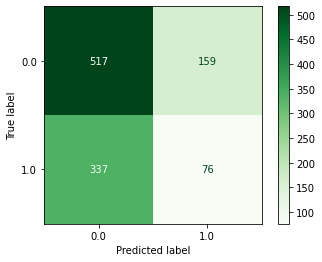

In [60]:
plot_confusion_matrix(model, X_test_C, YC_test, cmap='Greens')

### No Lineales

#### Árboles de Decisión

##### Escalado

In [61]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_total_C= scaler.fit_transform(X_train_total)
X_test_C= scaler.fit_transform(X_test)


##### Entrenamiento

In [62]:
param_grid = {
    'max_depth': [6,7, 8, 9, 10],
    'criterion':['gini', 'entropy'],
    'min_samples_split': [5, 10, 20, 30, 40, 50, 100],
    'min_samples_leaf':[5, 10, 20, 30, 40, 50] 
}

model_tree = DecisionTreeClassifier(random_state=seed)
cv = GridSearchCV(model_tree, param_grid, scoring=["recall", "accuracy", "precision", "f1"], cv=4, refit=False)
cv.fit(X_train_total_C, YC_train_total)


results_tree = cv.cv_results_
params_tree = results_tree['params']

##### Métricas y Matríz de Confusión.

In [63]:
results_df_tree = pd.DataFrame(results_tree)
results_df_tree.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_recall',
       'split1_test_recall', 'split2_test_recall', 'split3_test_recall',
       'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision', 'mean_test_precision',
       'std_test_precision', 'rank_test_precision', 'split0_test_f1',
       'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'mean_test_f1',
       'std_test_f1', 'rank_test_f1'],
      dtype='object')

In [64]:
relevant_metrics=["mean_test_recall", "std_test_recall",
            "mean_test_accuracy", "std_test_accuracy",
            "mean_test_precision", "std_test_precision", 'mean_test_f1',
            "rank_test_recall", 'rank_test_precision', 'rank_test_accuracy', 'rank_test_f1']

params_tree= ['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split']

results_df_tree= results_df_tree[relevant_metrics + params_tree]
results_df_tree

,mean_test_recall,std_test_recall,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_f1,rank_test_recall,rank_test_precision,rank_test_accuracy,rank_test_f1,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split
0,0.454898,0.051364,0.651370,0.008045,0.624379,0.007494,0.524507,261,165,190,264,gini,6,5,5
1,0.454898,0.051364,0.651370,0.008045,0.624379,0.007494,0.524507,261,165,190,264,gini,6,5,10
2,0.453426,0.051089,0.651213,0.008004,0.624577,0.007601,0.523600,286,158,196,280,gini,6,5,20
3,0.454163,0.050160,0.651370,0.008045,0.624581,0.007424,0.524178,275,157,190,273,gini,6,5,30
4,0.457108,0.051672,0.649960,0.007150,0.621002,0.008131,0.524691,244,242,214,263,gini,6,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.476996,0.029263,0.637905,0.012088,0.594291,0.023600,0.528188,69,400,393,197,entropy,10,50,20
416,0.476996,0.029263,0.637905,0.012088,0.594291,0.023600,0.528188,69,400,393,197,entropy,10,50,30
417,0.476996,0.029263,0.637905,0.012088,0.594291,0.023600,0.528188,69,400,393,197,entropy,10,50,40
418,0.476996,0.029263,0.637905,0.012088,0.594291,0.023600,0.528188,69,400,393,197,entropy,10,50,50


In [65]:
highest_rank= 1
results_df_tree[results_df_tree['rank_test_recall']== highest_rank]

,mean_test_recall,std_test_recall,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_f1,rank_test_recall,rank_test_precision,rank_test_accuracy,rank_test_f1,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split
406,0.503497,0.024547,0.647458,0.01645,0.602975,0.023261,0.548506,1,364,321,1,entropy,10,40,5
407,0.503497,0.024547,0.647458,0.01645,0.602975,0.023261,0.548506,1,364,321,1,entropy,10,40,10
408,0.503497,0.024547,0.647458,0.01645,0.602975,0.023261,0.548506,1,364,321,1,entropy,10,40,20
409,0.503497,0.024547,0.647458,0.01645,0.602975,0.023261,0.548506,1,364,321,1,entropy,10,40,30
410,0.503497,0.024547,0.647458,0.01645,0.602975,0.023261,0.548506,1,364,321,1,entropy,10,40,40
411,0.503497,0.024547,0.647458,0.01645,0.602975,0.023261,0.548506,1,364,321,1,entropy,10,40,50


In [66]:
clf_best_tree = DecisionTreeClassifier(random_state=seed, criterion="entropy", max_depth=10, min_samples_leaf=40,min_samples_split=10)
clf_best_tree.fit(X_train_total_C, YC_train_total)
y_pred_best_tree = clf_best_tree.predict(X_test_C)
y_train_pred = clf_best_tree.predict(X_train_total_C)

In [67]:
train_acc = accuracy_score(YC_train_total, y_train_pred)
test_acc = accuracy_score(YC_test, y_pred_best_tree)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.7
Test accuracy: 0.58


In [68]:
print(classification_report(YC_test, y_pred_best_tree))

              precision    recall  f1-score   support

         0.0       0.63      0.78      0.69       676
         1.0       0.41      0.25      0.31       413

    accuracy                           0.58      1089
   macro avg       0.52      0.51      0.50      1089
weighted avg       0.54      0.58      0.55      1089



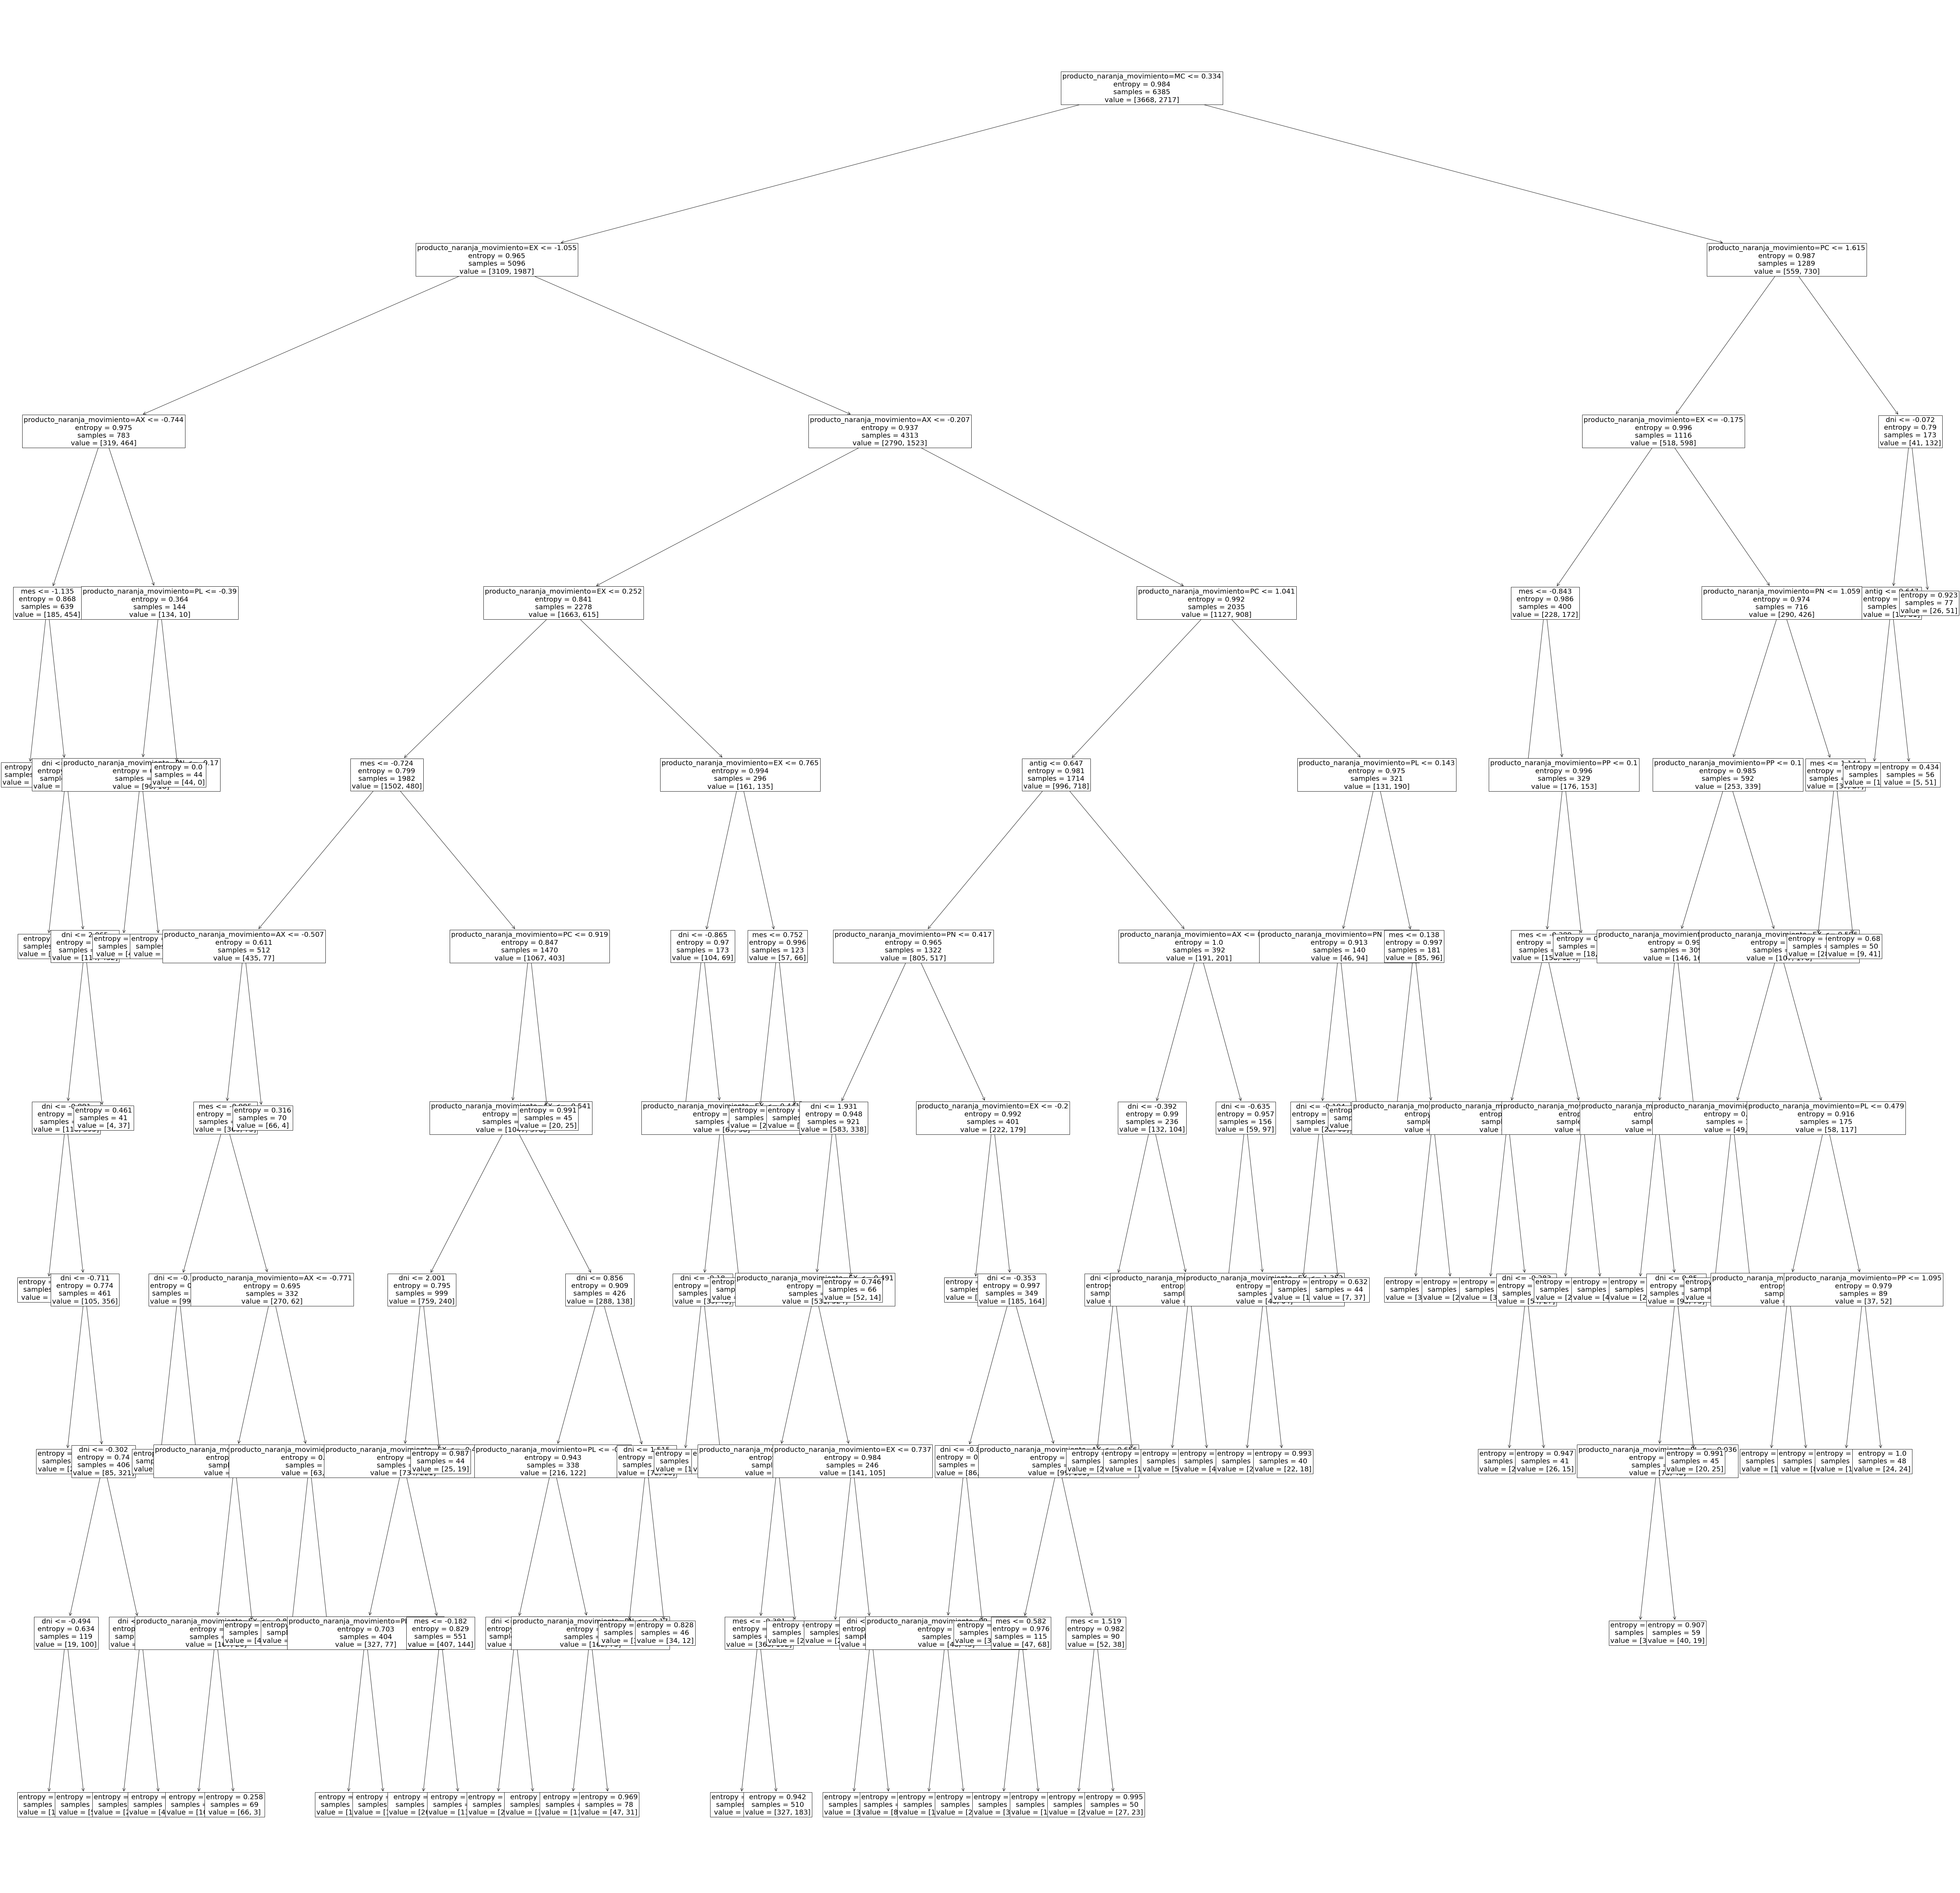

In [69]:
plt.figure(figsize=(100,100))
plot_tree(clf_best_tree, fontsize=20, feature_names= df.columns);
#plt.show()
plt.savefig("arbol.jpg")

Text(0.5, 1.0, 'Árbol - Matriz de confusión del conjunto de test')

<Figure size 432x288 with 0 Axes>

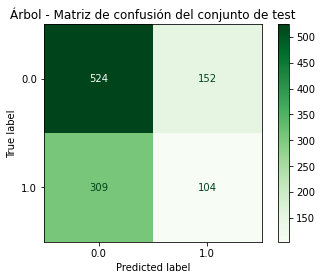

In [70]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_test_C, y_true=YC_test,
                      normalize=None, cmap='Greens', values_format='d').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de test')

#### Conclusiones

Las métricas seleccionadas como las pricipales a la hora de evaluar el modelos son Accuracy y F1, ya que consideramos que nuestro objetivo se encuentra relativamente balanceado, y que ningun valor tiene mayor importamcia que el otro. Así y todo utilizamos como referencia el F1 para no perder de vista el balance en los resultados.
Luego de aplicar distintos modelos, vemos que el árbol de decisión nos arroja mejores resultados.
Aún así piodemos decir que stos modelos no resultados convincentes como para usar en producción.


## 5. Optativo
* Graficar la curva ROC del modelo elegido en el punto anterior, Explicar.